# Analysis of the 6 peak F=? Rb87 line

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import gridspec
from scipy.optimize import curve_fit

%matplotlib inline

In [3]:
class initialCleanUp:
    """ Cleaning up of the raw oscilliscope data. """
    def __init__(self, dataset):
        self.dataset = dataset
    
    def removeColsAndRows(self, dataStartRow):

        """
        Remove columns and rows that aren't useful for
        plotting.
        DataStartRow is the row where the data starts in the file.
        """

        self.dataset.drop(self.dataset.columns[[2]], axis=1, inplace=True)


        self.dataset = self.dataset.drop(labels=range(0, dataStartRow), axis=0)

        return self.dataset

Text(0.5, 1.0, 'This is a plot of the raw data from the oscilliscope. ')

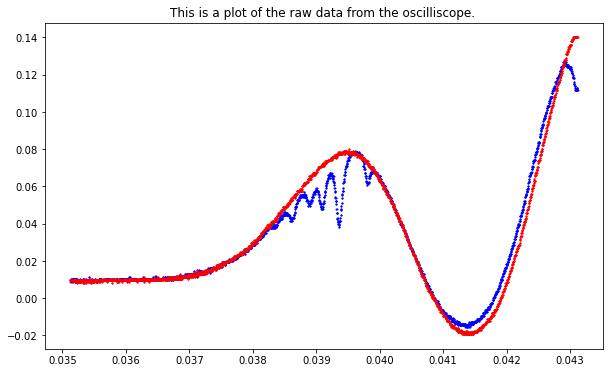

In [5]:
# Get the raw data from the oscilloscopes output
rawFree6PeakData = pd.read_csv('/Users/starman/Desktop/PycharmProjects-fall-2021/'
                      'phy445-Lab1-FINAL/Data/doppler6Peaks-zoomedOut/'
                      'A0000CH1.CSV')

rawBroadened6PeakData = pd.read_csv('/Users/starman/Desktop/PycharmProjects-fall-2021/'
                      'phy445-Lab1-FINAL/Data/doppler6PeaksBroadened--zoomedOut/'
                      'A0001CH1.CSV')

rawCopiedFree6PeakData = rawFree6PeakData.copy()
rawCopiedBroadened6PeakData = rawBroadened6PeakData.copy()


dataStart = 17

# Clear the unnessecary rows and columns from the raw data
cleanedUpFree6PeakData = initialCleanUp(rawCopiedFree6PeakData).removeColsAndRows(dataStart)
cleanedUpFree6PeakData.columns = ['x', 'y']
cleanedUpFree6PeakData = cleanedUpFree6PeakData.astype(float)


cleanedUpBroad6PeakData = initialCleanUp(rawCopiedBroadened6PeakData).removeColsAndRows(dataStart)
cleanedUpBroad6PeakData.columns = ['x', 'y']
cleanedUpBroad6PeakData = cleanedUpBroad6PeakData.astype(float)

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])


ax1.scatter(cleanedUpFree6PeakData['x'], cleanedUpFree6PeakData['y'], c='blue', s=1)
ax1.scatter(cleanedUpBroad6PeakData['x'], cleanedUpBroad6PeakData['y'], c='red', s=1)


plt.title("This is a plot of the raw data from the oscilliscope. ")





             x  y_dopplerFree  y_dopplerBroadened  y_diff
0     0.035124         0.0096              0.0088 -0.0008
1     0.035126         0.0096              0.0096  0.0000
2     0.035128         0.0096              0.0096  0.0000
3     0.035130         0.0104              0.0096 -0.0008
4     0.035132         0.0104              0.0096 -0.0008
...        ...            ...                 ...     ...
3993  0.043110         0.1130              0.1400  0.0270
3994  0.043112         0.1130              0.1400  0.0270
3995  0.043114         0.1130              0.1400  0.0270
3996  0.043116         0.1130              0.1400  0.0270
3997  0.043118         0.1120              0.1400  0.0280

[3998 rows x 4 columns]


Text(0.5, 1.0, 'Difference between doppler broadened and the doppler free y values.')

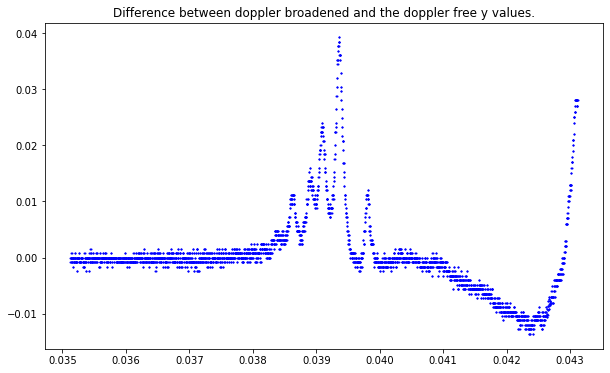

In [11]:

# Merging the two separate datasets together
togetherness = pd.merge(cleanedUpFree6PeakData, cleanedUpBroad6PeakData, on=['x'])
togetherness.columns = ['x', 'y_dopplerFree', 'y_dopplerBroadened']

# Taking the difference between doppler broadened and the doppler free
togetherness['y_diff'] = togetherness['y_dopplerBroadened'] - togetherness['y_dopplerFree']
print(togetherness)

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(togetherness['x'], togetherness['y_diff'], s=1, c='blue')

plt.title('Difference between doppler broadened and the doppler free y values.')

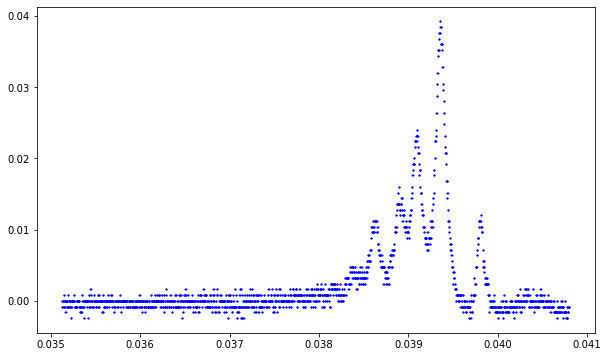

In [12]:
choppedFlatData = togetherness.loc[(togetherness.x <= 0.0408)]


# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(choppedFlatData['x'], choppedFlatData['y_diff'], s=1, c='blue')

# Fitting this curve with 6 gaussians

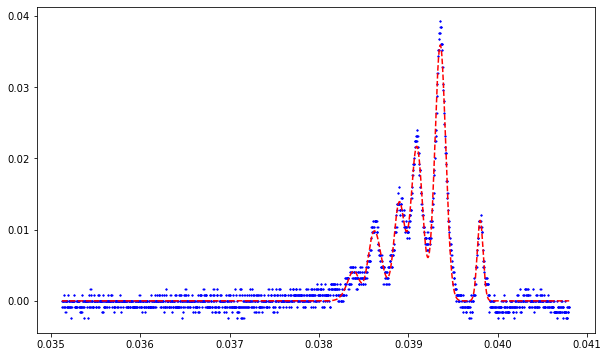

In [38]:
def sixGaussian(x, amp1,cen1,sig1, amp2,cen2,sig2, amp3,cen3,sig3, amp4,cen4,sig4, amp5,cen5,sig5,
               amp6,cen6,sig6):
    return (amp1*(1/(sig1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sig1)**2.0))) +
           amp2*(1/(sig2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sig2)**2.0))) +
           amp3*(1/(sig3*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen3)/sig3)**2.0))) + 
           amp4*(1/(sig4*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen4)/sig4)**2.0))) + 
           amp5*(1/(sig5*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen5)/sig5)**2.0))) +
           amp6*(1/(sig6*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen6)/sig6)**2.0))))


guess = [0.01,0.0383,1e-5, 0.01,0.0389,1e-5, 0.01,0.0388,1e-5, 0.01,0.0391,1e-5, 0.01,0.0394,1e-5, 0.01,0.0399,1e-5]

fitParameters, covParameters = curve_fit(f=sixGaussian,
                                        xdata = choppedFlatData['x'],
                                        ydata = choppedFlatData['y_diff'],
                                        p0 = guess)

ampl1, cent1, sigm1 = fitParameters[0], fitParameters[1], fitParameters[2]
ampl2, cent2, sigm2 = fitParameters[3], fitParameters[4], fitParameters[5]
ampl3, cent3, sigm3 = fitParameters[6], fitParameters[7], fitParameters[8]
ampl4, cent4, sigm4 = fitParameters[9], fitParameters[10], fitParameters[11]
ampl5, cent5, sigm5 = fitParameters[12], fitParameters[13], fitParameters[14]
ampl6, cent6, sigm6 = fitParameters[15], fitParameters[16], fitParameters[17]

fit_parametersOutput = [sixGaussian(i, ampl1,cent1,sigm1, ampl2,cent2,sigm2, ampl3,cent3,sigm3,
                                ampl4,cent4,sigm4, ampl5,cent5,sigm5, ampl6,cent6,sigm6) 
                       for i in choppedFlatData['x']]

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(choppedFlatData['x'], choppedFlatData['y_diff'], s=1, c='blue')
ax1.plot(choppedFlatData['x'], fit_parametersOutput, '--', c='red')


# Calculating sigmaY for this curve

## Finding a linear segment of this curve (need to check to see if this is a bad segment)

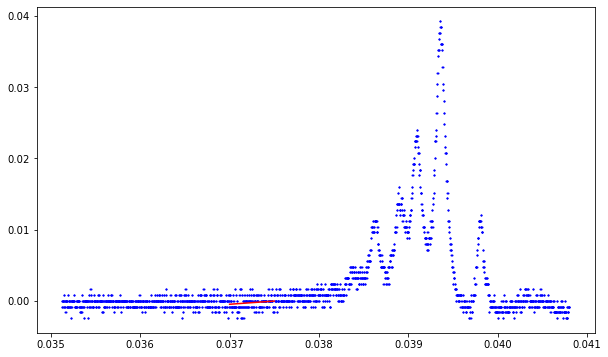

In [40]:
choppedLinearSegment = choppedFlatData.loc[(choppedFlatData.x >= 0.037) & 
                                          (choppedFlatData.x <= 0.0375)]


def linear(x,a,b):
    return a*x + b

guess = [0.1,0]
fitParameters1, covParameters1 = curve_fit(f=linear,
                                          xdata = choppedLinearSegment['x'],
                                          ydata = choppedLinearSegment['y_diff'],
                                          p0 = guess)

a1, b1 = fitParameters1[0], fitParameters1[1]

linearFitValues = pd.DataFrame(choppedLinearSegment['x'])
linearFitValues['y'] = [linear(i,a1,b1) for i in choppedLinearSegment['x']]


# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(choppedFlatData['x'], choppedFlatData['y_diff'], s=1, c='blue')
ax1.plot(choppedLinearSegment['x'], linearFitValues['y'], c='red')

## Zooming in on linear segment

            x  y_dopplerFree  y_dopplerBroadened  y_diff_rawData  y_bestFit  \
0    0.037000         0.0112              0.0120          0.0008  -0.000475   
1    0.037002         0.0120              0.0112         -0.0008  -0.000474   
2    0.037004         0.0120              0.0112         -0.0008  -0.000472   
3    0.037006         0.0120              0.0128          0.0008  -0.000470   
4    0.037008         0.0120              0.0128          0.0008  -0.000468   
..        ...            ...                 ...             ...        ...   
246  0.037492         0.0176              0.0168         -0.0008  -0.000035   
247  0.037494         0.0184              0.0168         -0.0016  -0.000034   
248  0.037496         0.0184              0.0168         -0.0016  -0.000032   
249  0.037498         0.0176              0.0184          0.0008  -0.000030   
250  0.037500         0.0176              0.0184          0.0008  -0.000028   

       diff_y  diff_y_squared  
0    0.001275    1.

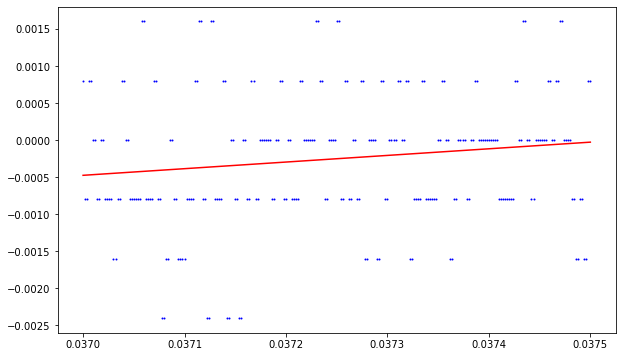

In [54]:
# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(choppedLinearSegment['x'], choppedLinearSegment['y_diff'], s=1, c='blue')
ax1.plot(choppedLinearSegment['x'], linearFitValues['y'], c='red')

# Merging the two data sets for easier difference calculation
result = pd.merge(choppedLinearSegment, linearFitValues, on=['x'])
result.columns = ['x', 'y_dopplerFree','y_dopplerBroadened', 'y_diff_rawData', 'y_bestFit']

# Calculating the difference between the raw data and the best fit y values, then squaring each of those columns
result['diff_y'] = result['y_diff_rawData'] - result['y_bestFit']
result['diff_y_squared'] = result['diff_y']**2.0
print(result)
sumOfDifferences = result['diff_y_squared'].sum()
numberOfRows = result['diff_y_squared'].count()

numberOfFitParameters = 2
degreesOfFreedom = numberOfRows + numberOfFitParameters + 1


sigmaY = np.sqrt(sumOfDifferences/degreesOfFreedom)
print('Sigma y value calculated for this linear segment:',sigmaY)

## Calculating the reduced chi-squared value for this distribution

In [67]:
interStep = pd.DataFrame(choppedFlatData['x'])
interStep['y_bestFit'] = [sixGaussian(i, ampl1,cent1,sigm1, ampl2,cent2,sigm2, ampl3,cent3,sigm3,
                                ampl4,cent4,sigm4, ampl5,cent5,sigm5, ampl6,cent6,sigm6) 
                               for i in choppedFlatData['x']]

wholeCurveValues = pd.merge(choppedFlatData, interStep, on=['x'])

# Taking the difference between the raw data and the best fit values
wholeCurveValues['y_diff_rawAndBestfit'] = wholeCurveValues['y_diff'] - wholeCurveValues['y_bestFit']

# Squaring the difference of the raw data and best fit values
wholeCurveValues['y_diffSquared'] = wholeCurveValues['y_diff_rawAndBestfit']**2.0

# Dividing the difference squared by the sigma value calculated in previous box squared
wholeCurveValues['y_diffSquared_dividedBySigmaSquared'] = wholeCurveValues['y_diffSquared'] / (sigmaY**2.0)

# Summing up all of the rows in the previously calculated column
sumOfDiffSquaredDividedBySigmaSquared = wholeCurveValues['y_diffSquared_dividedBySigmaSquared'].sum()
print('Sum:',sumOfDiffSquaredDividedBySigmaSquared)

numberOfRowsInDataframeColumns = wholeCurveValues['y_diffSquared_dividedBySigmaSquared'].count()

numberOfParameters1 = 12
degreesOfFreedom1 = numberOfRowsInDataframeColumns + numberOfParameters1 + 1
print('Degrees of freedom:', degreesOfFreedom1)

# Calculating the chi-squared reduced value
chiSquared_reduced_value = sumOfDiffSquaredDividedBySigmaSquared / numberOfRowsInDataframeColumns
print('Chi-squared reduced value:', chiSquared_reduced_value)

print('----------------------------------')
print(wholeCurveValues)




Sum: 3598.080877461448
Degrees of freedom: 2852
Chi-squared reduced value: 1.2673761456362973
----------------------------------
             x  y_dopplerFree  y_dopplerBroadened  y_diff      y_bestFit  \
0     0.035124         0.0096              0.0088 -0.0008  2.133589e-211   
1     0.035126         0.0096              0.0096  0.0000  3.754026e-211   
2     0.035128         0.0096              0.0096  0.0000  6.602976e-211   
3     0.035130         0.0104              0.0096 -0.0008  1.161016e-210   
4     0.035132         0.0104              0.0096 -0.0008  2.040761e-210   
...        ...            ...                 ...     ...            ...   
2834  0.040792         0.0048              0.0032 -0.0016   1.508919e-94   
2835  0.040794         0.0040              0.0032 -0.0008   1.036568e-94   
2836  0.040796         0.0040              0.0032 -0.0008   7.118455e-95   
2837  0.040798         0.0040              0.0032 -0.0008   4.886855e-95   
2838  0.040800         0.0040      